# Lab 1.2: Custom Filters and Convolution Kernels

**Objective:** Create and apply custom convolution kernels to understand image processing effects
- Learn how Gaussian blur smooths images
- Understand edge detection with Sobel operators
- Explore image sharpening techniques


In [ ]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Load image from disk
image_path = "images/img1.jpeg"
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display original image
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [ ]:
# Define custom convolution kernels for different image processing effects

# 1. Gaussian Blur Kernel (3×3) - Smooths and reduces noise
gaussian_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32) / 16


# 2. Horizontal Edge Detection (Sobel-X) - Detects vertical edges
sobel_x_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)


# 3. Vertical Edge Detection (Sobel-Y) - Detects horizontal edges
sobel_y_kernel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)


# 4. Sharpening Kernel - Enhances edges and details
sharpen_kernel = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
], dtype=np.float32)

In [ ]:
# Apply each kernel to the grayscale image using 2D convolution
gaussian_img = cv2.filter2D(img_gray, -1, gaussian_kernel)
sobel_x_img = cv2.filter2D(img_gray, -1, sobel_x_kernel)

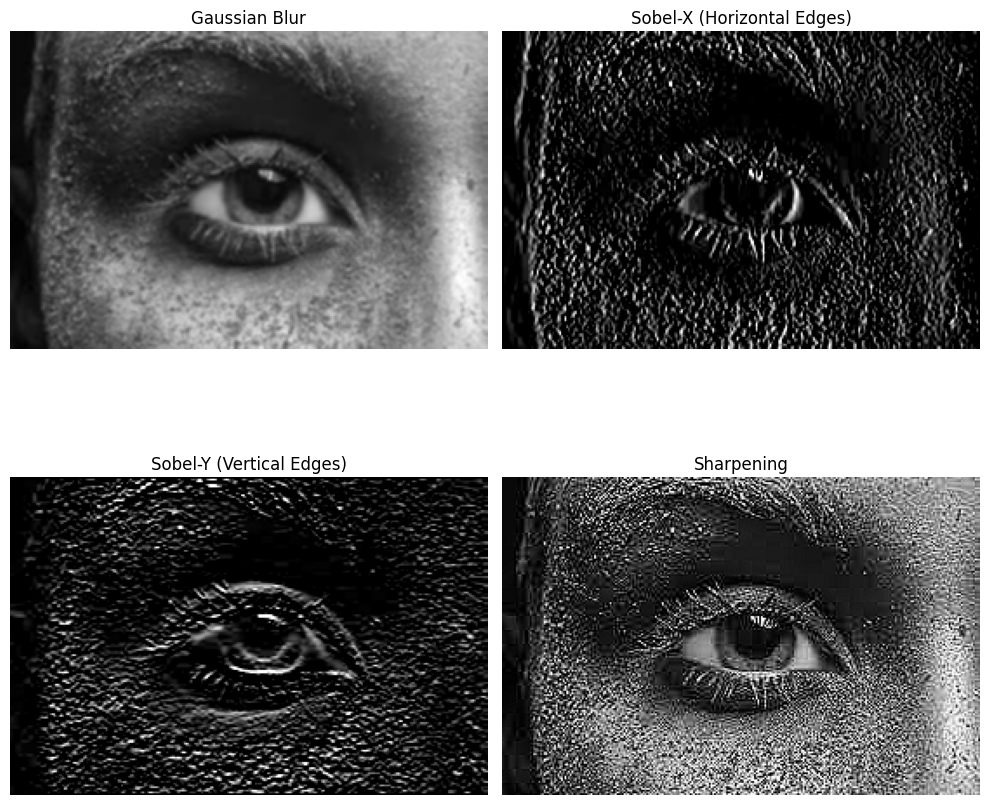

In [ ]:
# Complete the remaining kernel applications
sobel_y_img = cv2.filter2D(img_gray, -1, sobel_y_kernel)
sharpen_img = cv2.filter2D(img_gray, -1, sharpen_kernel)

# Display all kernels effects side by side
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.title("Gaussian Blur - Smoothing Noise", fontsize=12)
plt.imshow(gaussian_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Sobel-X - Horizontal Edge Detection", fontsize=12)
plt.imshow(sobel_x_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Sobel-Y - Vertical Edge Detection", fontsize=12)
plt.imshow(sobel_y_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Sharpening - Detail Enhancement", fontsize=12)
plt.imshow(sharpen_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

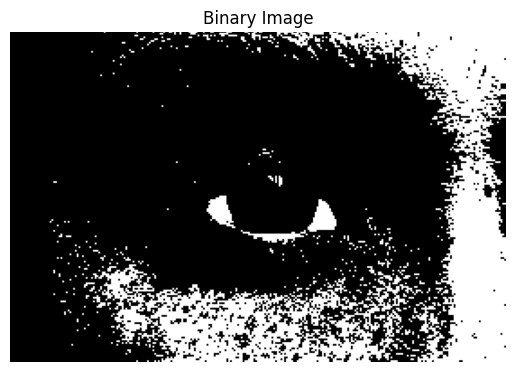

In [ ]:
# Convert grayscale image to binary (black and white only)
_, binary_img = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# Display binary image
plt.imshow(binary_img, cmap='gray')
plt.title("Binary Thresholding (Threshold = 127)", fontsize=12)
plt.axis("off")
plt.show()

In [ ]:
# Create a 3×3 kernel for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Erosion: Shrink white regions (remove small objects)
eroded = cv2.erode(binary_img, kernel, iterations=1)

# Dilation: Expand white regions (fill small holes)
dilated = cv2.dilate(binary_img, kernel, iterations=1)

# Visualize morphological operations
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("Erosion - Shrinks white regions", fontsize=12)
plt.imshow(eroded, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Dilation - Expands white regions", fontsize=12)
plt.imshow(dilated, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## Kernel Comparison Table

| Kernel            | Best For                | Effect Observed |
|------------------|-------------------------|-----------------|
| Gaussian Blur    | Noise reduction         | Smooths image, reduces detail |
| Sobel-X          | Horizontal edges        | Highlights vertical lines |
| Sobel-Y          | Vertical edges          | Highlights horizontal lines |
| Sharpening       | Enhancing details       | Makes edges and textures more prominent |

### Observations:
- Gaussian blur reduces high-frequency noise.
- Sobel filters detect gradients in specific directions.
- Sharpening enhances edge contrast and fine details.